

# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is the movie database which has data related to movies with columns like **popularity, budget, revenue, vote_count,runtime, id, title, cast, homepage, director, genres, release_year** and so on..
>
> We will not consider all the columns as important we will take only those which are important for data analysis and to get inference out of this data.
>
>Follwoing questions we will clarified by our analysis
>
>**1.Which genres are most popular from 2005 to 2015?**
>
>**2.What kinds of properties are associated with movies that have high revenues?**
>
>**3.Who all acted in the most popular movies?**
>
>**4.Which genres are most popular from 2008 - 2018?**
>
>**5.Movie with highest vote count?**
>
>**6.Movie with maximum runtime?**

In [1]:
#import all required packages 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This section we will load the selected TMDb data and check for null values and plot graphs if needed

### General Properties

In [1]:
# Load TMDb data saved in the local drive 
data_file_path = r'tmdb-movies.csv'
df = pd.read_csv(data_file_path)

NameError: name 'pd' is not defined

In [3]:
#describe the dataset which we can see mean,standard deviation other major properties.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#check the data types of the given dataset columns.
df.info();
#once it prints we can see int,float and object (which is a string type) of data in columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#now check for NaN or empty fields in the dataset.
df.isnull().sum()
#sum will give the count of null values of each column.

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#Check for duplicates inthe dataset
df.duplicated().sum()
#if duplicates are present we need to drop them, we will do that in next section.

1

### Data Cleaning
> Now we know in brief the datatypes of columns in dataset and we know which column has NaN values and duplicates we need to eliminate them for better understanding of the dataset.
>As we saw in the above section we have null values and duplicates in the data we need to clean them.
first we will fix the Null values in the columns.to do that we have two methods one to drop the null values or fill it with value which suits for the data.
>
>1.df.dropna()
    Drop rows with any column having NA/null data.
>
>2.df.fillna(value)
    Replace all NA/null data with value.
>
>Here we will choose the second method to fill the data with average of value in that particular column as this will not add
bias to our data and dropping might cause issue as there are more rows with null value.

In [7]:
#display the nan counts
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#since here the null values are all strings will replace with string unknown 
df = df.fillna('UNKNOWN')
#check for nullvalues now
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [9]:
#but will drop the duplicate value which is redundant 
df.drop_duplicates(inplace=True)

In [10]:
# check was duplicte removal success 
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
>
>Now we will answer  our intially set up queries by plotting graphs and returning with the answers.


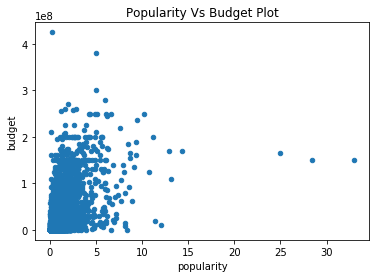

In [11]:
#Co-relation graphs between 
#1. popularity vs budget 
#2. budget vs revenue
#3. runtime vs popularity
df.plot.scatter(x='popularity',y='budget',title='Popularity Vs Budget Plot');

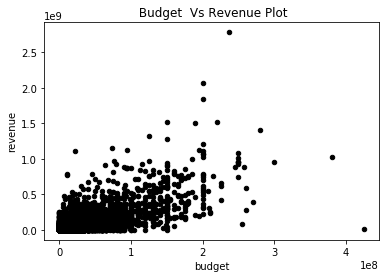

In [12]:
#2. budget vs revenue
df.plot.scatter(x='budget',y='revenue',title=' Budget  Vs Revenue Plot',color='k');

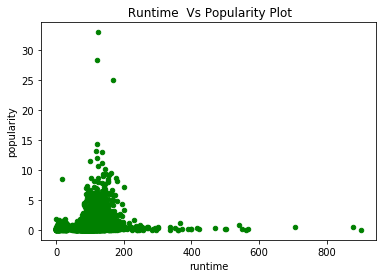

In [13]:
#3. runtime vs popularity
df.plot.scatter(x='runtime',y='popularity',title=' Runtime  Vs Popularity Plot',color='g');

### 1.Which movies are most popular from 2005 to 2015?

In [14]:
#for this we need to see the popularity score of all the movies in between the given years(2005-2015).
#lets plot and see how it looks 
df_x = df[(df['release_year'] >= 2005) & (df['release_year'] <= 2015) ]

In [15]:
#top 5 movies with highest popularity between 2005-2015 with their respective genres
qa1 = df_x.sort_values('popularity',ascending=False).head(5)
qa1[['popularity','original_title','genres']]

,popularity,original_title,genres
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
629,24.949134,Interstellar,Adventure|Drama|Science Fiction
630,14.311205,Guardians of the Galaxy,Action|Science Fiction|Adventure
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller


###  2.What kinds of properties are associated with movies that have high revenues?

In [16]:
# top 5 Movies with highest revenue is foundby sorting revenue by descending order 
qa2 =df.sort_values('revenue',ascending=False).head(5)
qa2[['imdb_id','popularity','revenue','original_title','genres','budget','vote_count','release_year']]

,imdb_id,popularity,revenue,original_title,genres,budget,vote_count,release_year
1386,tt0499549,9.432768,2781505847,Avatar,Action|Adventure|Fantasy|Science Fiction,237000000,8458,2009
3,tt2488496,11.173104,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,200000000,5292,2015
5231,tt0120338,4.355219,1845034188,Titanic,Drama|Romance|Thriller,200000000,4654,1997
4361,tt0848228,7.637767,1519557910,The Avengers,Science Fiction|Action|Adventure,220000000,8903,2012
0,tt0369610,32.985763,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,150000000,5562,2015


###  3.Who all acted in the most popular movies?

In [17]:
#get the popularity of movies and get their cast
qa3 = df.sort_values('popularity',ascending=False).head(5)
qa3[['popularity','original_title','cast']]

,popularity,original_title,cast
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
629,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...
630,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...


### 4.Which genres are most popular from 2008 - 2018?

In [18]:
#get dataframe between the given years
df_y = df[(df['release_year'] >= 2008) & (df['release_year'] <= 2018)]

In [19]:
#apply filter to get most common genres
df_y['genres'].value_counts().head(1)

Drama    379
Name: genres, dtype: int64

### 5.Movie with highest vote count?

In [20]:
#get the id of row with maxvote count and print the row values
df.iloc[df['vote_count'].idxmax()]

id                                                                  27205
imdb_id                                                         tt1375666
popularity                                                        9.36364
budget                                                          160000000
revenue                                                         825500000
original_title                                                  Inception
cast                    Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...
homepage                            http://inceptionmovie.warnerbros.com/
director                                                Christopher Nolan
tagline                              Your mind is the scene of the crime.
keywords                 loss of lover|dream|sleep|subconsciousness|heist
overview                Cobb, a skilled thief who commits corporate es...
runtime                                                               148
genres                  Action|Thrille

### 6.Movie with maximum runtime?

In [21]:
#get max runtime row id and print its properties
df.loc[df['runtime'].idxmax()]

id                                                                 125336
imdb_id                                                         tt2044056
popularity                                                       0.006925
budget                                                                  0
revenue                                                                 0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
homepage                http://www.channel4.com/programmes/the-story-o...
director                                                     Mark Cousins
tagline                                                           UNKNOWN
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
overview                The Story of Film: An Odyssey, written and dir...
runtime                                                               900
genres                                

<a id='conclusions'></a>
## Conclusion
> **Summary**: From the above analysis we came to know that most occuring genre in between the year 2008-2018 is Drama.
and the cast who acted in the most polular movie Jurassic World , properties of movies with high revenues. And most popular movies in between the year 2005-2015. And movie with highest viewer vote count and maximum runtime. And corelation between budget and popularity and budget with revenue earned and runtime with popularity is shown in graphs.
>
> **Inference**: we can see from the plots that as the runtime is around 200 min then these movies are more popular. And as the budget increases popularity too will increase except few cases.Most of the average budget movies are also popular.